**Задание 1**

In [174]:
df <- read.csv("music_genre.csv")

df <- df[sample(nrow(df), 20000),]
df <- df[!duplicated(df),]
df <- df[!(df$artist_name == "empty_field"),]
df <- df[complete.cases(df),]

head(df)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
42495,25807,Maurice Ravel,"Piano Concerto in G Major, M. 83: II. Adagio assai",20,0.98100,0.158,541053,0.0347,0.945000,E,0.1090,-28.526,Major,0.0356,?,3-Apr,0.0385,Classical
9562,68420,KOTOKO,Light My Fire,38,0.00102,0.467,229027,0.9730,0.035700,G,0.0528,-1.236,Minor,0.1430,93.15299999999999,4-Apr,0.4450,Anime
10425,36947,Najee,Have You Ever Loved Somebody,29,0.18500,0.645,320573,0.5680,0.007740,E,0.1290,-9.702,Minor,0.0340,88.87700000000001,4-Apr,0.7160,Jazz
26480,38993,YBN Cordae,Locationships,73,0.23100,0.715,182520,0.4820,0.000000,F,0.1430,-9.381,Minor,0.4450,136.297,4-Apr,0.6860,Rap
35594,67512,Vance Joy,Crashing Into You,57,0.53500,0.679,188133,0.6390,0.000577,G,0.0795,-4.979,Major,0.0251,104.99799999999999,4-Apr,0.3150,Rock
12095,34919,Dojo Cuts,Easy To Come Home,47,0.51300,0.779,213933,0.4990,0.009070,E,0.0769,-8.311,Minor,0.0392,92.546,4-Apr,0.7310,Jazz


**Задание 2**

In [135]:
# Пункт 1
genre_share <- table(df$music_genre) / length(df$music_genre)
genre_share_df <- data.frame(Percentage = genre_share)
colnames(genre_share_df) <- c('Genre', 'Share')
print(genre_share_df)

# Пункт 2
genre_counts_df <- data.frame(genre = names(genre_counts), count = as.numeric(genre_counts))
most_common_genre <- names(which.max(genre_counts))
ggplot(genre_counts_df, aes(x = count, y = genre, fill = genre)) +
  geom_col() +
  scale_fill_manual(values = ifelse(genre_counts_df$genre == most_common_genre, "red", "grey")) +
  labs(x = "Count", y = "Genre", title = "Distribution of Tracks by Genre")

# Пункт 3
danceability_by_genre <- df %>%
  group_by(music_genre) %>%
  summarize(mean_danceability = mean(danceability))
danceability_by_genre_sorted <- danceability_by_genre %>%
  arrange(desc(mean_danceability))
most_danceable_genre <- danceability_by_genre_sorted$music_genre[1]
cat("The most danceable genre is", most_danceable_genre, "\n")

# Пункт 4
genre_mode <- df %>%
  group_by(music_genre, mode) %>%
  count()
print(genre_mode)

The most danceable genre is Hip-Hop 


**Задание 3**

Artist Nobuo Uematsu has the most tracks in this bar 
Artist ? & The Mysterians has the fewest tracks in this bar 


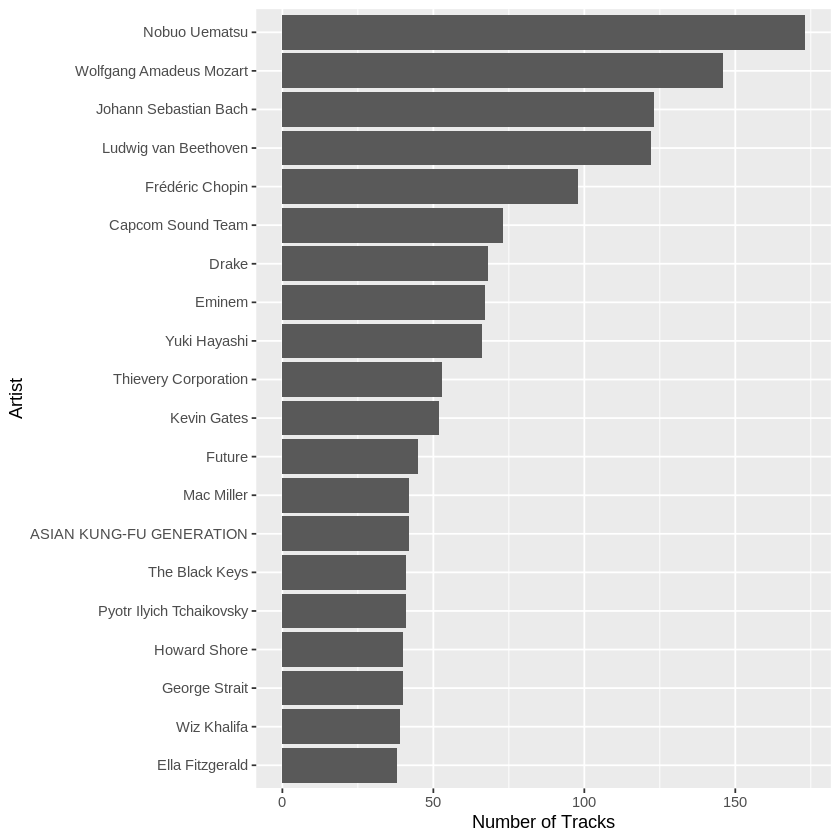

In [121]:
# Пункт 1
most_tracks <- names(which.max(table(df$artist_name)))
least_tracks <- names(which.min(table(df$artist_name)))
cat('Artist', most_tracks, 'has the most tracks in this bar', '\n')
cat('Artist', least_tracks, 'has the fewest tracks in this bar', '\n')

# Пункт 2
artist_track_count <- df %>%
  group_by(artist_name) %>%
  count()
artist_track_count <- artist_track_count %>%
  arrange(desc(n))
top_20_artists <- artist_track_count %>%
  head(20)
ggplot(top_20_artists, aes(x = reorder(artist_name, n), y = n)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(x = "Artist", y = "Number of Tracks")

**Задание 4**

The correlation between the name of the track and the popularity is: -0.2241507

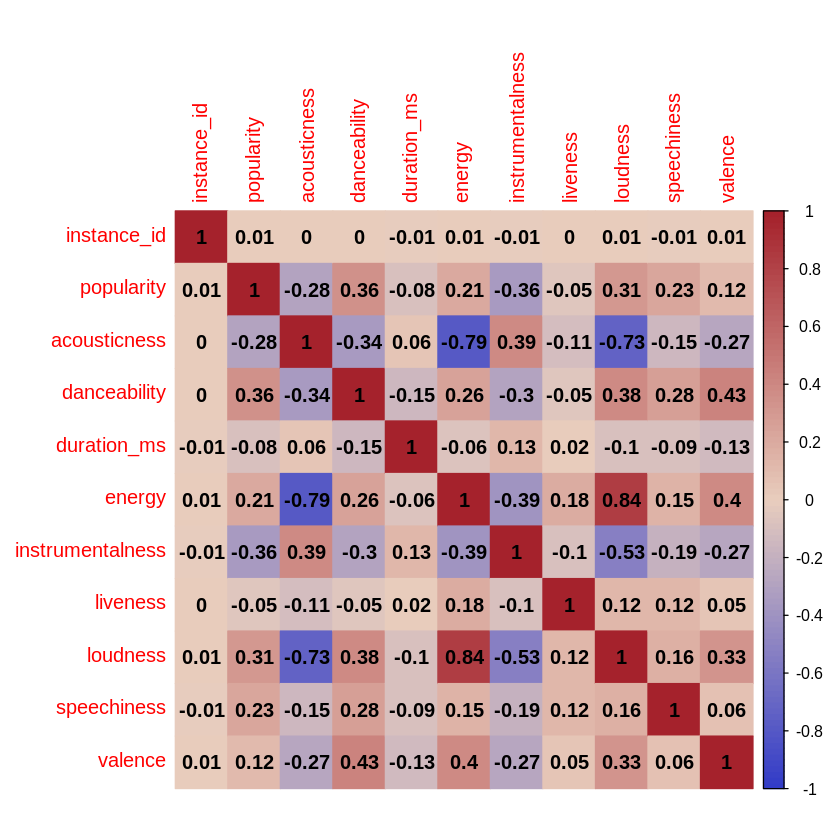

In [139]:
# Пункт 1
features <- df[, sapply(df, is.numeric)]
correlation_matrix <- cor(features)
library(corrplot)
corrplot(correlation_matrix, method = "color", col = colorRampPalette(c("#323CC8", "#E9CEBE", "#A5222C"))(n = 100), addCoef.col = "black")

# Пункт 2
correlation <- cor(nchar(df$track_name), df$popularity)
cat('The correlation between the name of the track and the popularity is:', correlation)

**Задание 5**

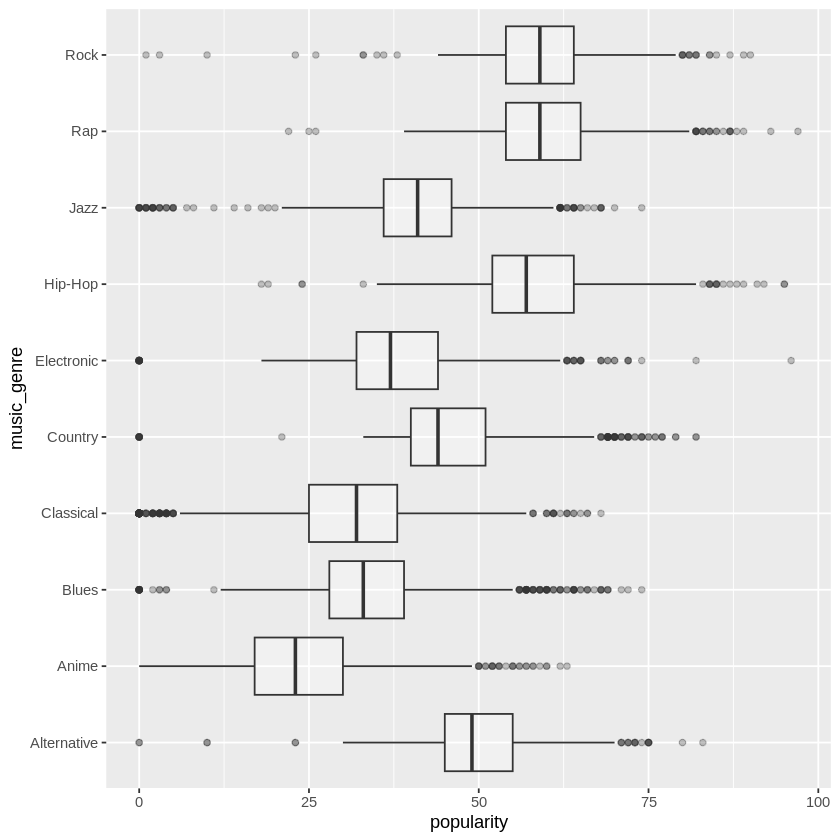

In [145]:
p_g <- df[, c("popularity", "music_genre")]
ggplot(p_g, aes(x = popularity, y = music_genre)) +
  geom_boxplot(alpha = 0.3) +
  theme(legend.position = "none")

**Задание 7**

**Задание 8**

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,длительность_трека,track_length
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
42495,25807,Maurice Ravel,"Piano Concerto in G Major, M. 83: II. Adagio assai",20,0.98100,0.158,541053,0.0347,0.945000,E,0.1090,-28.526,Major,0.0356,?,3-Apr,0.0385,Classical,long,длинная
9562,68420,KOTOKO,Light My Fire,38,0.00102,0.467,229027,0.9730,0.035700,G,0.0528,-1.236,Minor,0.1430,93.15299999999999,4-Apr,0.4450,Anime,medium,средняя
10425,36947,Najee,Have You Ever Loved Somebody,29,0.18500,0.645,320573,0.5680,0.007740,E,0.1290,-9.702,Minor,0.0340,88.87700000000001,4-Apr,0.7160,Jazz,long,длинная
26480,38993,YBN Cordae,Locationships,73,0.23100,0.715,182520,0.4820,0.000000,F,0.1430,-9.381,Minor,0.4450,136.297,4-Apr,0.6860,Rap,medium,средняя
35594,67512,Vance Joy,Crashing Into You,57,0.53500,0.679,188133,0.6390,0.000577,G,0.0795,-4.979,Major,0.0251,104.99799999999999,4-Apr,0.3150,Rock,medium,средняя
12095,34919,Dojo Cuts,Easy To Come Home,47,0.51300,0.779,213933,0.4990,0.009070,E,0.0769,-8.311,Minor,0.0392,92.546,4-Apr,0.7310,Jazz,medium,средняя


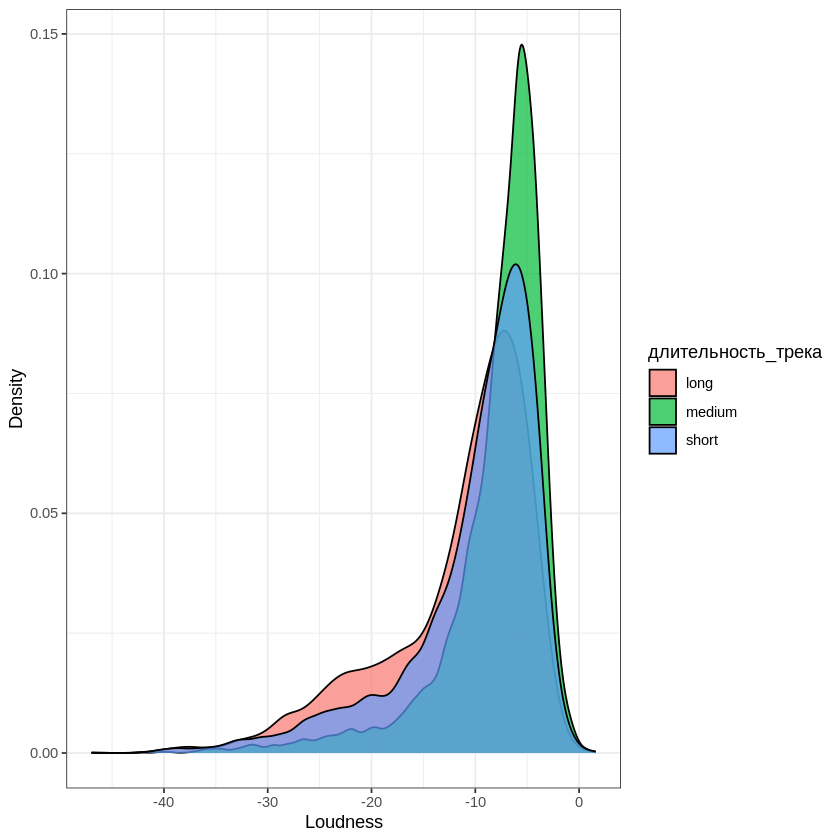

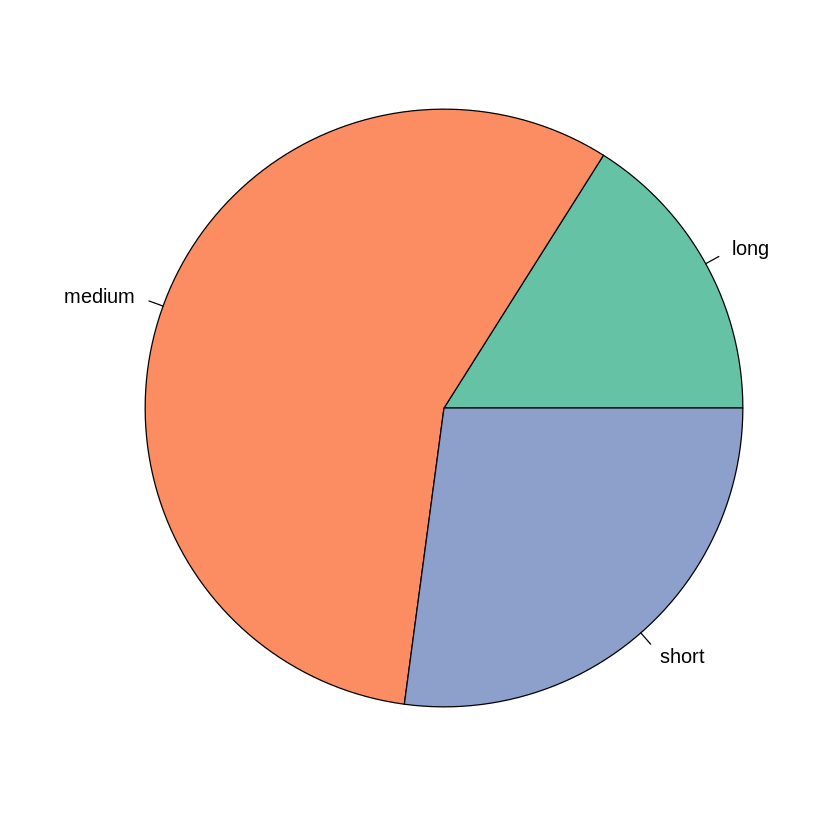

In [197]:
library('ggplot2')
library(RColorBrewer)

# Пункт 1
df$длительность_трека <- ifelse(df$duration_ms <= 180000, "short", ifelse(df$duration_ms > 180000 & df$duration_ms <= 300000, "medium", "long"))
head(df)

# Пункт 2
ggplot(df, aes(x = loudness, fill = длительность_трека)) +
  geom_density(alpha = 0.7) +
  xlab("Loudness") +
  ylab("Density") +
  theme_bw()

# Пункт 3
counts <- df %>%
  group_by(длительность_трека) %>%
  summarize(count = n())

myPalette <- brewer.pal(5, 'Set2')
pie_chart <- pie(counts$count, labels = counts$длительность_трека,
                 cex = 1, radius = 1.05, col = myPalette)